In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.seasonal as seasonal
%matplotlib inline

(statsmodels 의 plot() 에 오류가 많아서 임의의 plot 함수를 만들 것임)

In [13]:
def plot_decompose(decompose_result: seasonal.DecomposeResult):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(
        nrows=4,
        ncols=1,
        figsize=(15, 8)
    )

    decompose_result.observed.plot(legend=False, ax=ax1)
    ax1.set_ylabel('Observed')
    decompose_result.trend.plot(legend=False, ax=ax2)
    ax2.set_ylabel('Trend')
    decompose_result.seasonal.plot(legend=False, ax=ax3)
    ax3.set_ylabel('Seasonal')
    decompose_result.resid.plot(legend=False, ax=ax4)
    ax4.set_ylabel('Resid')

## ETS Decomposition (Error, Trend, Seasonality)

### Additive Model

원래,  
  
$y_t = Level(Cyclical) + Trend + Seasonality + Noise(Error)$  
  
이지만,  
statsmodels 에서의 ETS Decomposition 은,  
  
$y_t = Trend + Seasonality + Resid(Noise + Cyclical)$  
  
이다.

__뒤에 Resid 를 Noise 와 Cyclical 로 decompose 하는 방법을 배울 것임__

In [21]:
# Sample
additive_sample = pd.Series([i + np.random.randint(1, 10) for i in range(0, 100)])

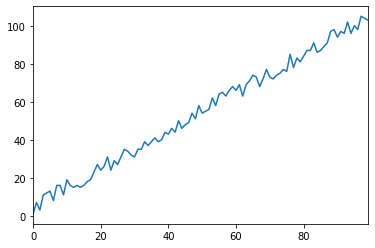

In [22]:
additive_sample.plot();

In [23]:
additive_decompose_result = seasonal.seasonal_decompose(
    additive_sample,
    model='additive',
    freq=1
)

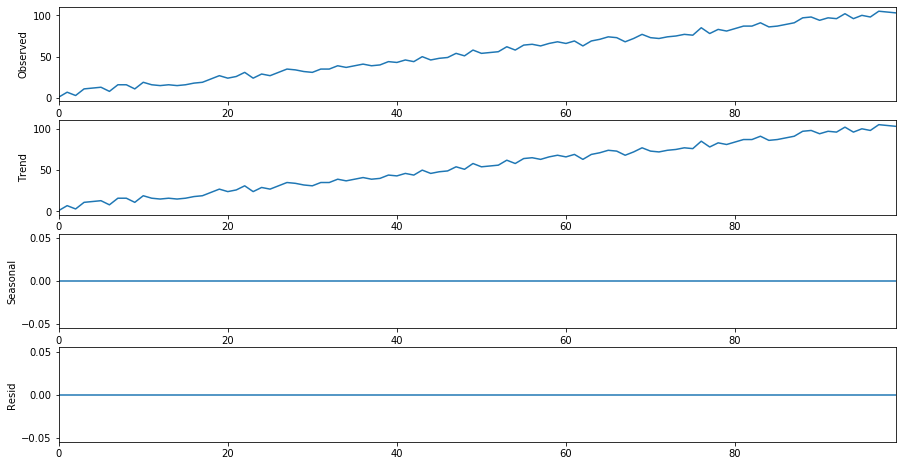

In [24]:
plot_decompose(additive_decompose_result)  # 왜 noise 가 안보일까

### Multiplicative Model

$y_t = Level(Cycrical) \times Trend \times Seasonality \times Noise(Erorr)$  
  
이며,  
전체에 로그를 씌우면 __Additive Model__ 과 같다.

In [28]:
# Sample
multiplicative_sample = pd.Series([i ** 2 + np.random.randint(1, 1000) for i in range(0, 100)])

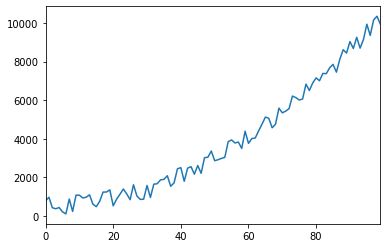

In [29]:
multiplicative_sample.plot();

In [30]:
multiplicative_decompose_result = seasonal.seasonal_decompose(
    multiplicative_sample,
    model='multiplicative',
    freq=1
)

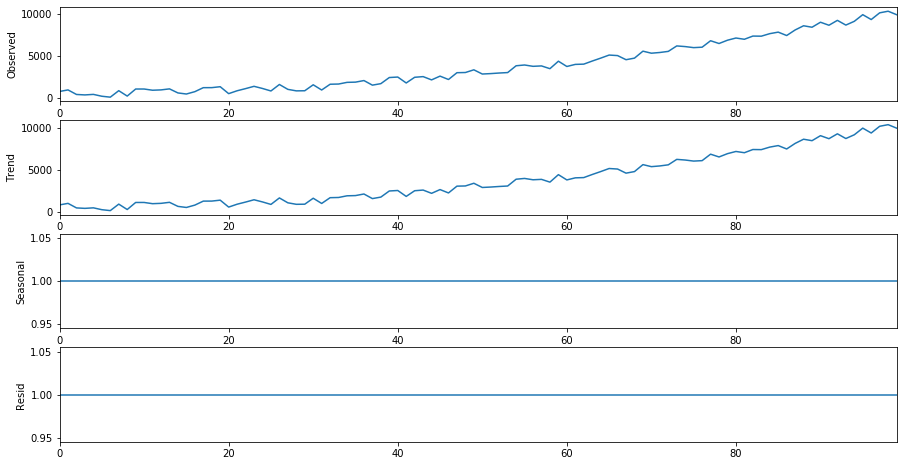

In [32]:
plot_decompose(multiplicative_decompose_result)

### Example - Airline Passengers

- __Additive Model__  
linear trend 를 가지고 있고, seasonality 와 trend 컴포넌트가 시간흐름에 따라 고정적일 때, _(ex: 매 년 승객 수 1만명 증가)_  
Additive Model 을 사용한다.
- __Multiplicative Model__  
non-linear trend 하게 증가하거나 감소하는 trend 를 가지고 있을 때, _(ex: 매 년 승객 수 두 배 증가)_  
Multiplicative Model 을 사용한다.

In [33]:
df_ap = pd.read_csv(
    "data/airline_passengers.csv",
    index_col='Month',
    parse_dates=True
)

In [34]:
df_ap.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


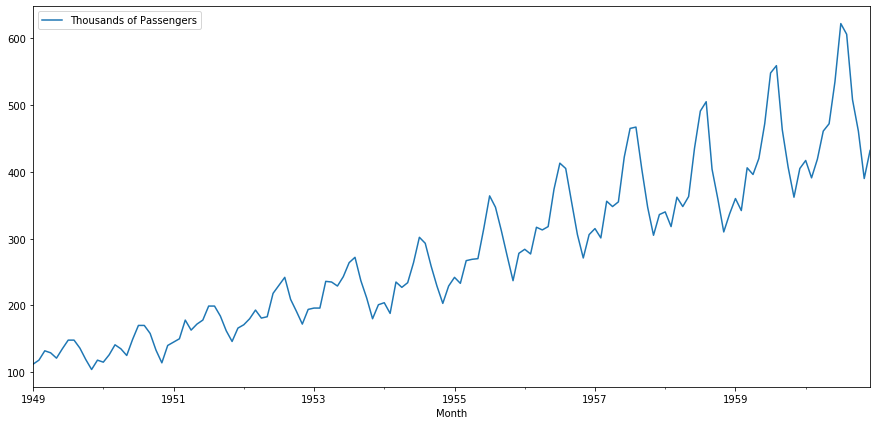

In [36]:
df_ap.plot(figsize=(15, 7));

(예제에서는, non-linear trend 를 가지고 있기에 Multiplicative Model 을 사용한다. (하지만 애매해서 Additive Model 도 사용 가능하다.))

In [38]:
ap_decompose_result = seasonal.seasonal_decompose(
    df_ap['Thousands of Passengers'],
    model='multiplicative'
)

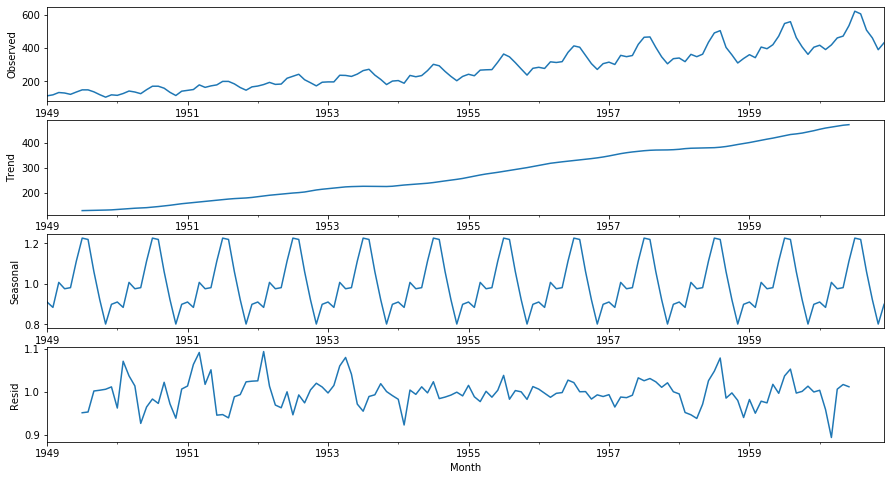

In [39]:
plot_decompose(ap_decompose_result)